In [9]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Read CSV
df = pd.read_csv("../dataset/preprocessed/cleaned_data.csv")

Daily Sales Trends

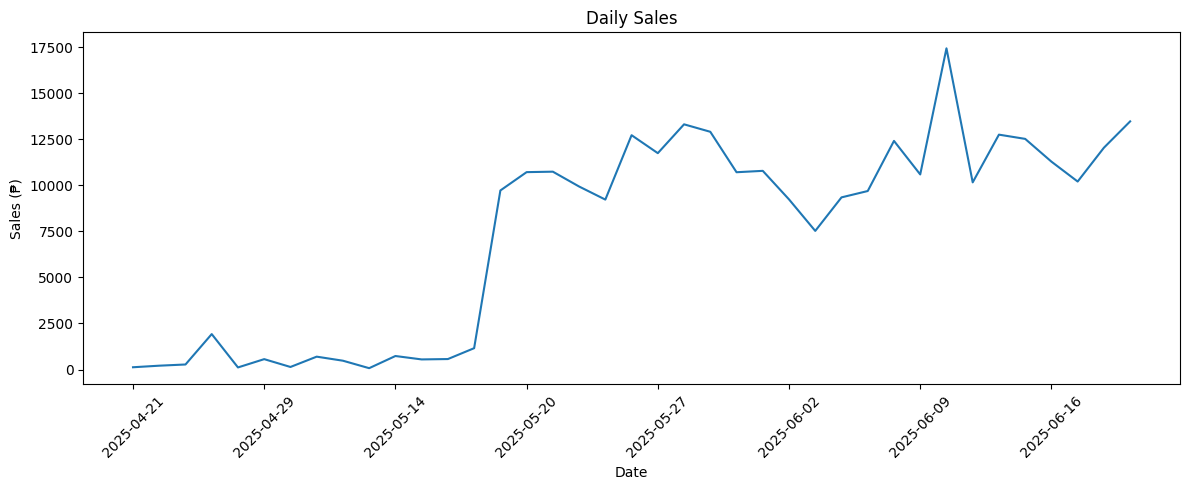

In [19]:
daily_sales = df.groupby('date')['total'].sum()

daily_sales.plot(kind='line', figsize=(12,5))
plt.title('Daily Sales')
plt.ylabel('Sales (₱)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Peak Ordering Hours

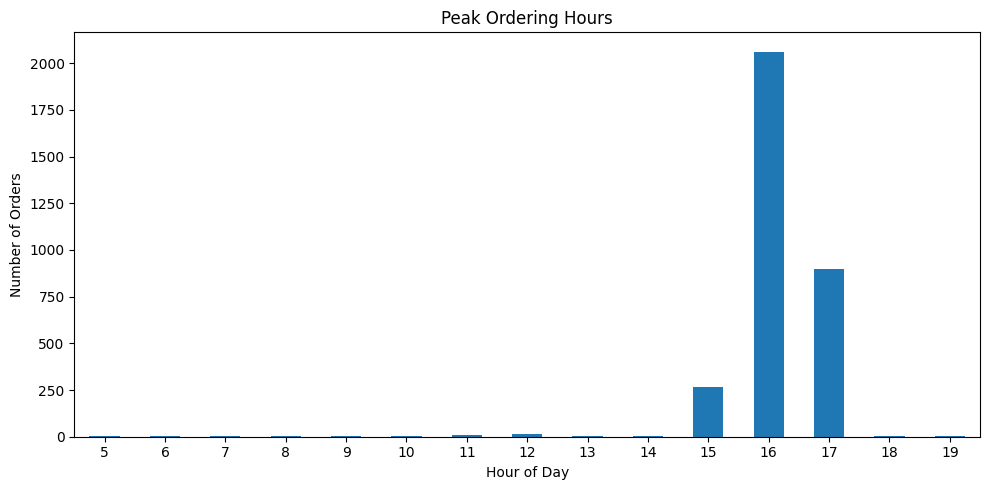

In [4]:
orders_by_hour = df.groupby('hour')['order_id'].nunique()

orders_by_hour.plot(kind='bar', figsize=(10,5))
plt.title('Peak Ordering Hours')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Average Basket Size by Time

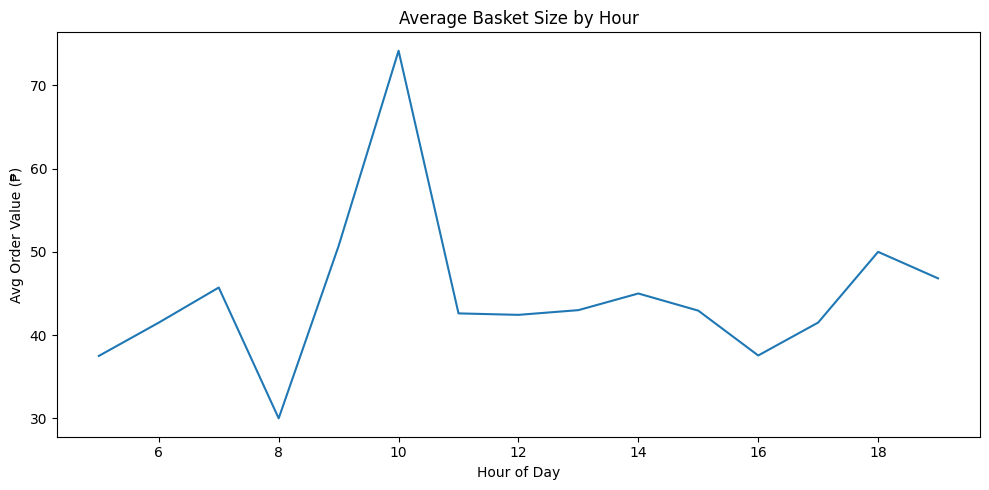

In [ ]:
basket_by_hour = df.groupby('hour')['total'].mean()

basket_by_hour.plot(kind='line', figsize=(10,5))
plt.title('Average Basket Size by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Avg Order Value (₹)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Sales by Weekday

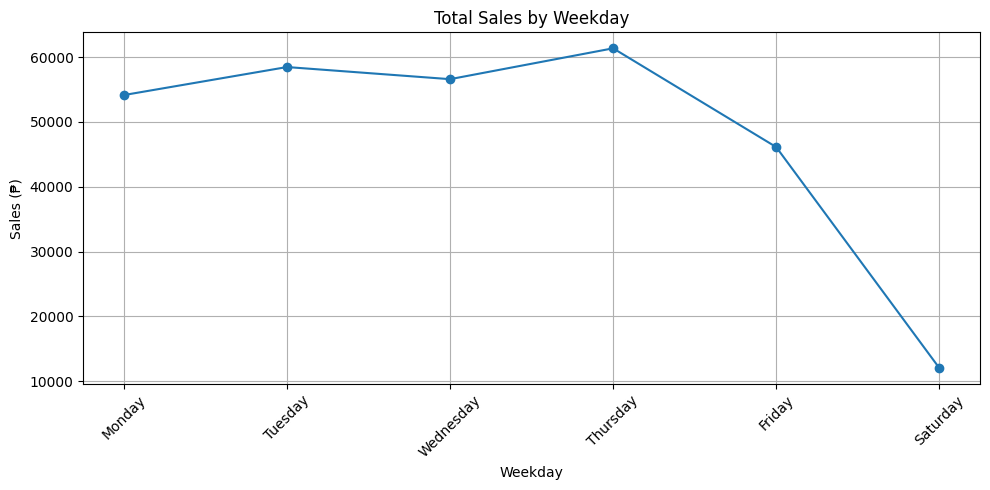

In [13]:
weekday_sales = df.groupby('weekday')['total'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

weekday_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Total Sales by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Sales (₱)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Order Volume Trends

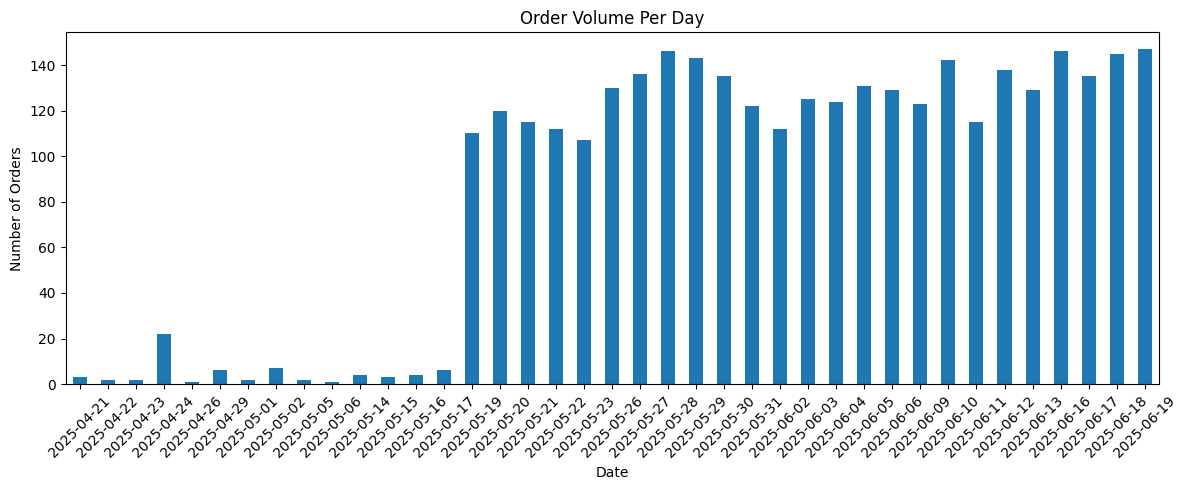

In [18]:
orders_per_day = df.groupby('date')['order_id'].nunique()

orders_per_day.plot(kind='bar', figsize=(12,5))
plt.title('Order Volume Per Day')
plt.ylabel('Number of Orders')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Time-Based Product Demand

C:\Users\ocana\AppData\Local\Temp\ipykernel_22772\2646243458.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


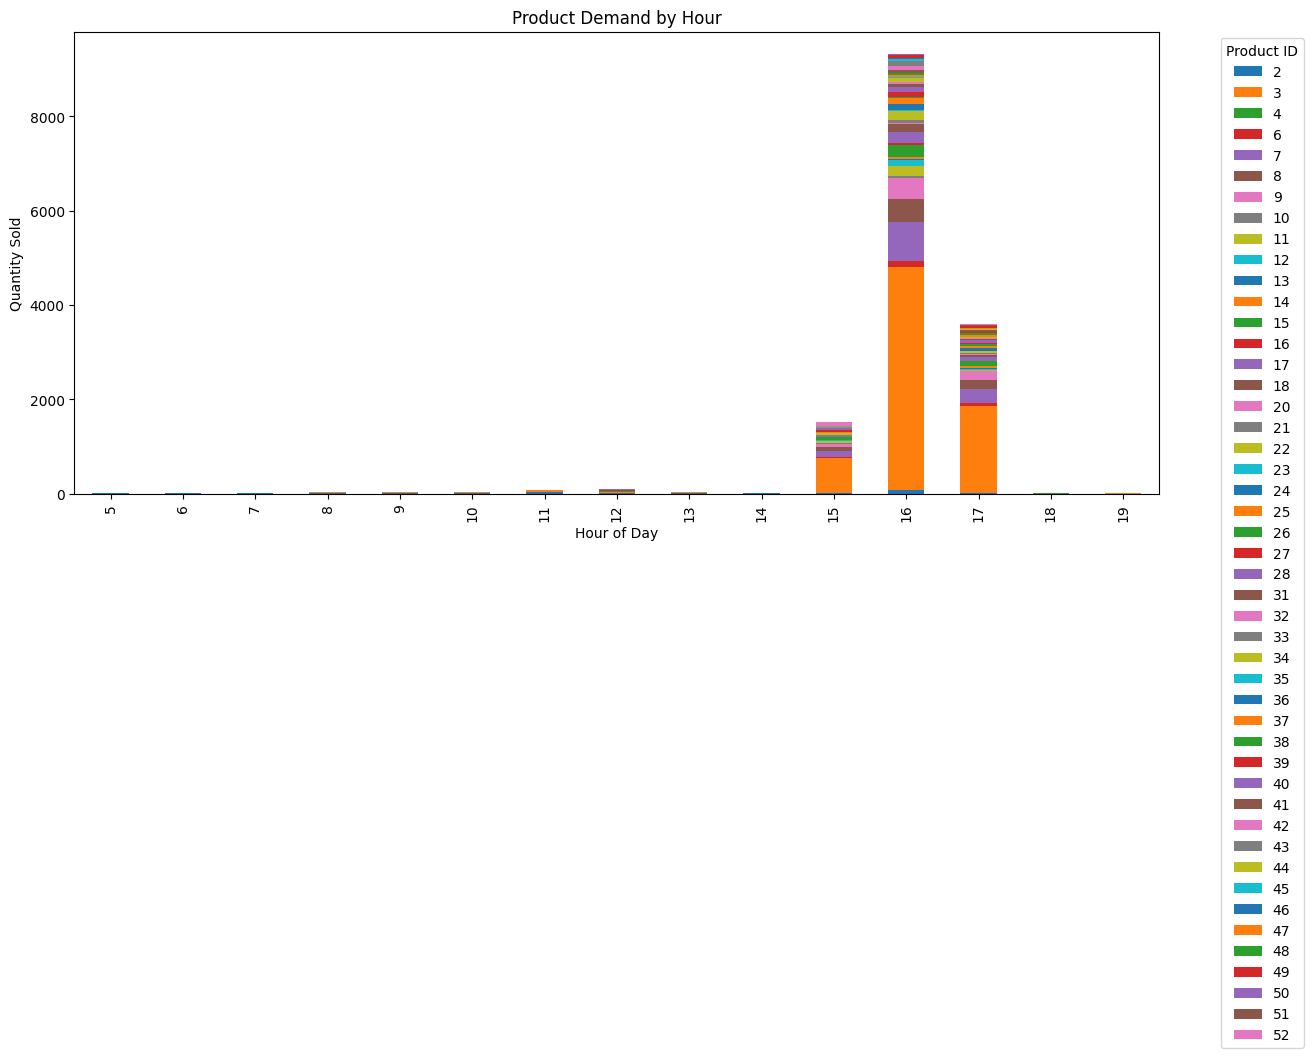

In [8]:
product_demand = df.groupby(['hour', 'product_id'])['quantity'].sum().unstack().fillna(0)

product_demand.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Product Demand by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Quantity Sold')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Heatmap: Orders by Hour vs Day

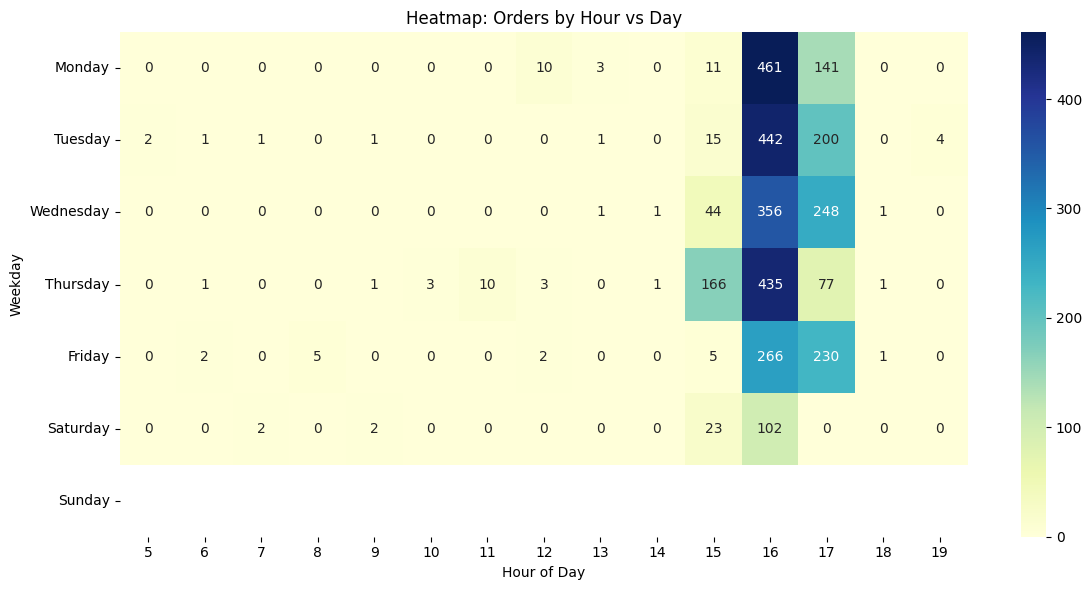

In [10]:
heatmap_data = df.groupby(['weekday', 'hour'])['order_id'].nunique().unstack().fillna(0)

# Reorder weekdays
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap: Orders by Hour vs Day')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()
